# Home Assignment No. 2
# Part 1

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/MyDrive/Skoltech/ML/to_solve/HW2_v2.0/')

# Part One

## Task 1 - Bayesian ML (2 pts)

In this task, you will be asked to create probabilistic models based on some predefined data and make predictions. 
Remember that the Bayesian approach to modelling is based on the following notions:

Given objects, that we use for training:
* $\theta$ - vector of parameters of the model
* $D$ - dataset

The underlying nature of these objects can be described:
* $p(\theta)$ - prior distribution
* $p(D | \theta)$ - posterior distribution

What we would like to achieve:
* posterior distribution $p(\theta | D)$:
$$
p(\theta | D) = \frac{p(D | \theta) p(\theta)}{p(D)} \propto p(D | \theta) p(\theta).
$$
* Evidence $p(D)$;
* Predictions $p(D_{new} | D)$:
$$
p(D_{new} | D) = \int p(D_{new} | \theta) p(\theta | D) d\theta.
$$

So, in other words, there are two main steps to Bayesian modeling, which will take place in this task:

1) choosing the best probabilistic model for observed data, i.e. specifying proper $p(\theta)$ and $p(D | \theta)$

2) computing the posterior distribution $p(\theta | D)$;

These two steps are exactly what you will be asked to do in the next subtasks.

One of the most widely used libraries in probabilistic programming is PyMC3, which transforms a lot of the math (such as Variational Inference) into simple functions. For those of you unfamiliar with PyMC3, here are the links to the tutorials, similar to what you should do in this task: https://docs.pymc.io/notebooks/getting_started (getting familiar with pymc3 library and its capabilities); https://docs.pymc.io/notebooks/marginalized_gaussian_mixture_model.html (Mixture models, which will be useful in one of the subtasks); https://docs.pymc.io/api/distributions.html (a lot of distributions available in PyMC3).

In [ ]:
import numpy as np
from numpy import random, sum as nsum, concatenate
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 16

In [ ]:
# these commands have been tested on Google Collab. If you are using 
# jupyter locally and this combination of commands is not working, try manually downloading pymc3, 
# depending on your OS: https://github.com/pymc-devs/pymc3#installation 
 
! pip install pymc3==3.6
! pip install arviz==0.4.0
! pip install pandas==0.24.2

     |████████████████████████████████| 30.7MB 135kB/s 
     |████████████████████████████████| 276kB 40.3MB/s 
  Created wheel for pymc3: filename=pymc3-3.6-cp37-none-any.whl size=857479 sha256=11da21274db64e6be3815b514f1cc29fca1de17038ed516a622f9c18a0d8e6b5
  Stored in directory: /root/.cache/pip/wheels/f1/08/5d/2cee5bff1159b3b4754377f51b0e4f40f116e8d4e069acbcdc
Successfully built pymc3
ERROR: librosa 0.8.0 has requirement joblib>=0.14, but you'll have joblib 0.12.5 which is incompatible.
  Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7
     |████████████████████████████████| 1.3MB 5.6MB/s 
     |████████████████████████████████| 4.7MB 20.2MB/s 
     |████████████████████████████████| 317kB 34.9MB/s 
     |████████████████████████████████| 10.1MB 3.8MB/s 
ERROR: xarray 0.15.1 has requirement pandas>=0.25, b

### Task 1.1 (1 pt.)
The first subtask is quite simple and designed to get you familiar with PyMC3. You will deal with a coin flip scenario: you suspect that there is some external factor, which you can control, that influences the outcome of your coin-flip. In order to check if your suspicions are true, you will conduct a simple A/B test, i.e. create a control and test group, for which the external factor will and will not be present, respectively. You will need to construct the probability model using PyMC3 to answer the question of its influence on the outcome.

To achieve that, please follow the completed code and the following plan:

1) Analyze the data - print out the mean for both groups, are they similar?

2) Built the probabilistic models for both groups: 

  1. What type of distribution does the likelihood of the coin-flip outcomes follow? What type of distribution do its parameters follow? Is there any prior knowledge about the parameters that we can use?

3) Sample from the modeled posterior distributions and analyze the results: after sampling, use `traceplot` function to plot the distributions of the model's parameters.

In order to achieve your point for this sub-task:

1) fill in the missing code

2) answer the questions in the devoted cell: are the control and test groups' posterior distributions comparable? can we say that the initial external factor actually influences the results of our coin-flips?

**NOTE**: when building the model you may find that a couple of different (or one being the special case of the other) distributions can fit, for example, the parameter distribution. You can choose whatever you prefer, the task will be assessed by the plotted results and your interpretation of them.
 

In [ ]:
import theano
import theano.tensor as T 
import pymc3 as pm

In [ ]:
#where 0 is test group and 1 is a control group
control_flips = [0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,
                   1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,
                   0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,
                   0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0]
test_flips = [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,
              0,0,0,0,1,0,0,0,0,1,0,0,0,0]

1) Analyze the data - print out the mean for both groups, are they similar?

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

print("control_flips mean =", np.mean(control_flips))
print("test_flips mean =", np.mean(test_flips))

### END SOLUTION (do not delete this comment!)

control_flips mean = 0.17
test_flips mean = 0.15


Built the probabalistic models for both groups.

In [ ]:
model_flips = pm.Model()
with model_flips:
    ### BEGIN SOLUTION (do not delete this comment!)
    p_c = pm.Uniform("p_c", lower=0, upper=1)
    p_t = pm.Uniform("p_t", lower=0, upper=1)

    res_t = pm.Bernoulli("res_t", p=p_t, observed=test_flips)
    res_c = pm.Bernoulli("res_c", p=p_c, observed=control_flips)
    ### END SOLUTION (do not delete this comment!)

Sample from the modelled posterior distributions and analyze the results (sampling is already filled in for you). To analyze the results: use pymc3's`traceplot` function to plot the distributions of the model's parameters; use pymc3's `summary` to have a look at the result in more detail.

In [ ]:
#sampling from the model
with model_flips:
    samples_flips = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p_t, p_c]
100%|██████████| 2000/2000 [00:01<00:00, 1207.40it/s]


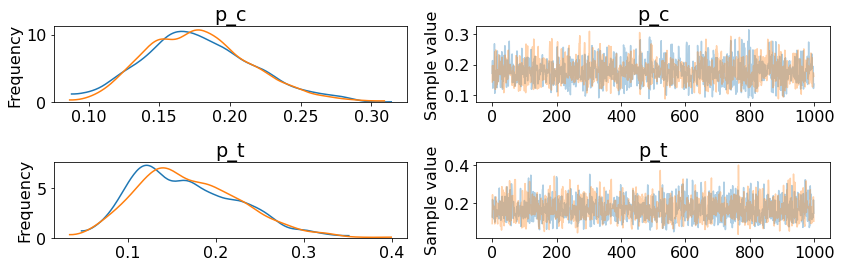

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
with model_flips:
    pm.traceplot(samples_flips);
### END SOLUTION (do not delete this comment!)

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
# summary here

with model_flips:
  display(pm.summary(samples_flips))

### END SOLUTION (do not delete this comment!)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p_c,0.177621,0.038155,0.000812,0.103261,0.251591,1999.979183,0.999559
p_t,0.167348,0.058458,0.001267,0.061484,0.276670,1944.060024,1.000508


**Answer the questions in the following cell: are the control and test groups' posterior distributions comparable? can we say that the initial external factor actually influeneces the results of our coin-flips?**

*BEGIN SOLUTION (do not delete this comment!)* 

I think, that control and test groups' posterior distributions are comparable. They have close $mean \pm std$ intervals. For control group distribution is denser (less variance, narrower posterior density regions), but it might be connected with the fact, thar for test group we have less observations (40 for test vs 100 for control).
So, the initial external factor seems not to influence results significantly.

*END SOLUTION (do not delete this comment!)*

### Task 1.2 (1 pt.)

Now that you have understood the basic PyMC3 pipeline, let's try to model more complex data in a similar manner: 

1) load file sample_bml.csv - this file contains 1000 samples of some data with two labels '0' and '1' (the first column represents the labels).

2) plot the histograms of both groups of data in one figure 

3) analyze the resulting plot - write in the cell what type of data is in front of you and its characteristics

4) build the model 

    1) What are the types of distributions you would use for each of the presented group of data? 
    
    2) What about the parameters of these distributions? 
    
    3) What distribution is the resulting likelihood follows?
 
5) sample from the resulting model

6) plot the trace - use pymc3's `traceplot`

7) sample from the posterior predictive distribution of the model - use pymc3's `sample_posterior_predictive`

8) once again plot the histogram of the original data distribution and the resulting posterior predictive distribution

9) analyzing the results that you have achieved in 7) and 9), answer the questions: assess the success of your model - can it accurately approximate the original data distribution? how can you improve this model, if you want to achieve even better results?

1) load file sample_bml.csv 

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

data = np.genfromtxt('sample_bml.csv')
target = data[:,0].astype(int)
values = data[:,1]

### END SOLUTION (do not delete this comment!)

2) plot the histogramms of both groups of data in one figure

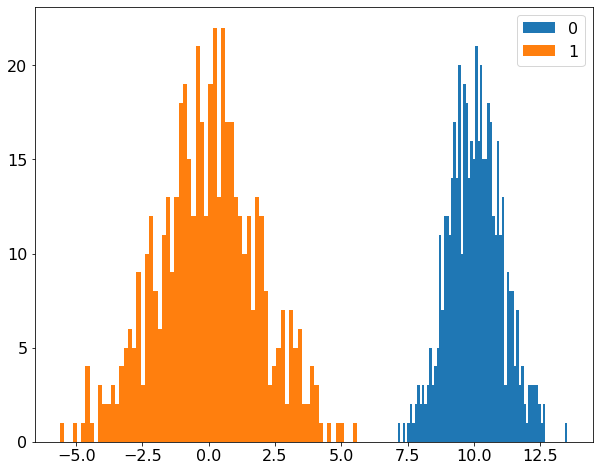

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
from matplotlib import pyplot

n_bins = 70

plt.figure(figsize=(10,8))
plt.hist(values[target==0], bins=n_bins, label='0')
plt.hist(values[target==1], bins=n_bins, label='1')
plt.legend(loc='upper right');


### END SOLUTION (do not delete this comment!)

3) analyze the resulting plot - write in the cell what type of data is in front of you and its characteristics

*BEGIN SOLUTION (do not delete this comment!)*

For both 0 and 1 classes distribution looks like normal. Mean for class 0 is 10, for class 1 is 0.

*END SOLUTION (do not delete this comment!)*

4) build the model 

In [ ]:
mixture_model = pm.Model()

with mixture_model:
  ### BEGIN SOLUTION (do not delete this comment!)

    mu = pm.Normal("mu", mu=[values[target==0].mean(), values[target==1].mean()], shape=2)
    sigma = pm.HalfNormal("sigma", sd=10, shape=2)
    weights = pm.Dirichlet("weights", np.ones(2))

    y = pm.NormalMixture("y", w=weights, mu=mu, sd=sigma, observed=values)

  ### END SOLUTION (do not delete this comment!)

5) sample from the resulting model

In [ ]:
with mixture_model:
    step = pm.NUTS()
    nuts_trace = pm.sample(2000, step)

Sequential sampling (2 chains in 1 job)
NUTS: [weights, sigma, mu]
100%|██████████| 2500/2500 [00:07<00:00, 325.66it/s]


6) plot the trace - use pymc3's traceplot

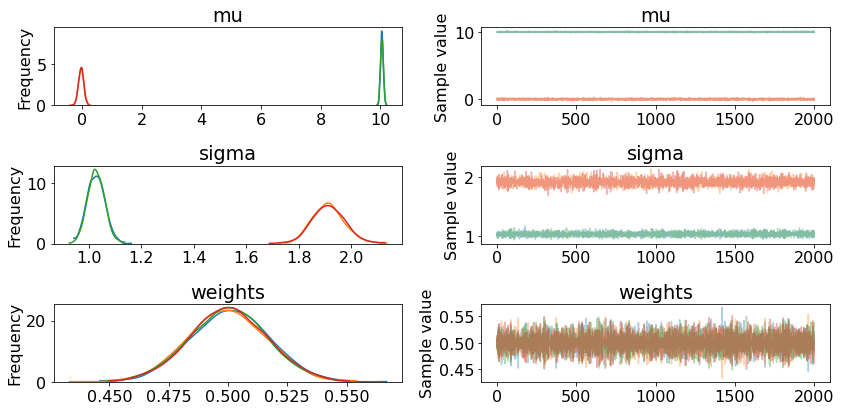

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
  
with mixture_model:
  pm.traceplot(nuts_trace)

### END SOLUTION (do not delete this comment!)

7) sample from the posterior predictive distribution of the model - use pymc3's sample_posterior_predictive



In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

with mixture_model:
  post_pred_samps = pm.sample_posterior_predictive(nuts_trace)
  
### END SOLUTION (do not delete this comment!)

100%|██████████| 4000/4000 [00:06<00:00, 629.43it/s]


8) once again plot the histogram of the original data distribution and the resulting posterior predictive distribution

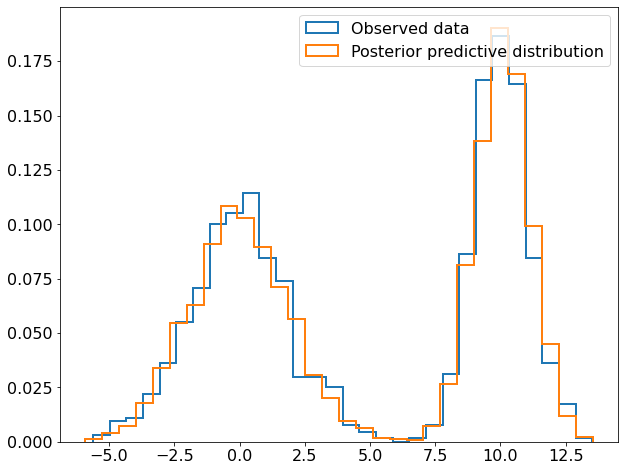

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

plt.figure(figsize=(10,8))
plt.hist(values, bins=30, label="Observed data", density=True, histtype='step', linewidth=2)
plt.hist(post_pred_samps['y'].flatten(), bins=30, label="Posterior predictive distribution", density=True, histtype='step', linewidth=2)
pyplot.legend(loc='upper right');
  
### END SOLUTION (do not delete this comment!)

**Answer the questions: asses the success of you model - can it accurately approximate the original data distribution? how can you improve this model, if you want to achieve even better results?**

*BEGIN SOLUTION (do not delete this comment!)*

The model approximates the original data distribution quite accurate. 

Maybe using separate models for separate classes could improve results.

*END SOLUTION (do not delete this comment!)*

## Task 2 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [ ]:
! pip install GPy==1.9.9

     |████████████████████████████████| 1.0MB 4.2MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp37-cp37m-linux_x86_64.whl size=2626997 sha256=85033723d9a5de40a174b09b109f83c4d19b1e035454c0a075c651d117637cc0
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp37-none-any.whl size=102552 sha256=1c15f17d14a125fc52fd6775d4d55068999895614550d1d02f41e547bb7f6ee4
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy paramz


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [ ]:
data.dropna(inplace=True)

In [ ]:
y = np.array(data.values)
X = np.array(data.index)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)
  
### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

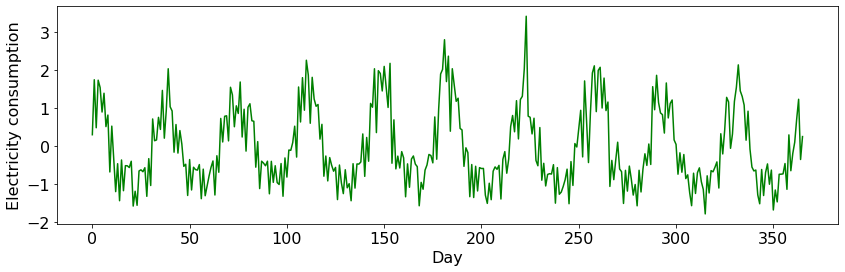

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
  
plt.figure(figsize=(14,4))

plt.plot(np.vstack((X_train, X_test)), np.vstack((y_train_scaled, y_test_scaled)), c='green')
#plt.plot(np.vstack((X_train, X_test)), np.vstack((y_train, y_test)), c='green')#if we need to plot not scaled one
plt.ylabel("Electricity consumption")
plt.xlabel("Day");

### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction.

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f4836862b10>],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f4831907d90>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f4831907ed0>]]}

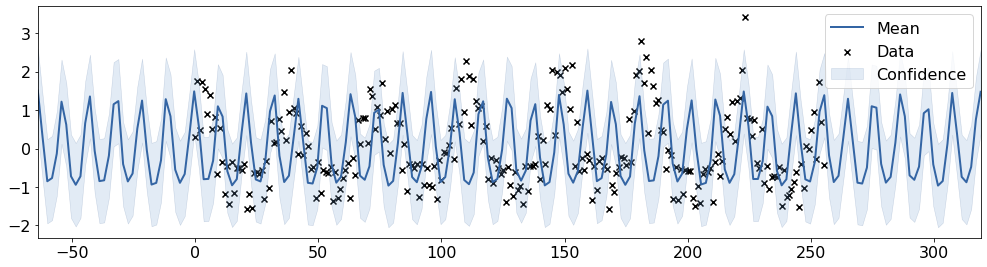

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
import GPy

input_dim = 1
variance = 1
lengthscale = 0.15
kernel = GPy.kern.StdPeriodic(input_dim, variance=variance,
                      lengthscale=lengthscale)

model = GPy.models.GPRegression(X_train, y_train_scaled, kernel)

model.optimize()
# print(model)

model.plot(figsize=(14, 4))

  
### END SOLUTION (do not delete this comment!)

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

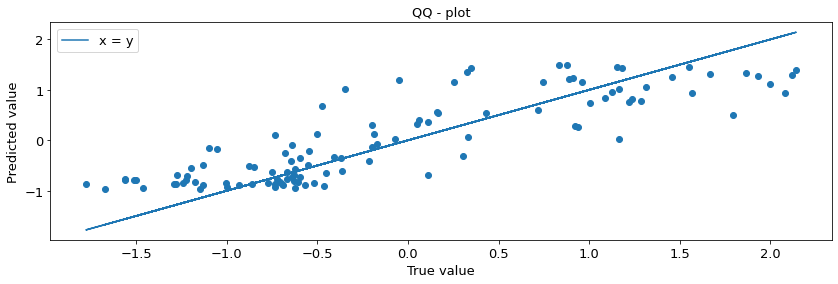

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

pred = model.predict(X_test)[0]

plt.figure(figsize = (14,4))

plt.scatter(y_test_scaled, pred)
plt.plot(y_test_scaled, y_test_scaled, label='x = y')

plt.xlabel("True value", fontsize=13)
plt.ylabel("Predicted value", fontsize=13)
plt.title("QQ - plot", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13);
  
### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.metrics import r2_score

print(r2_score(y_test_scaled, pred))

### END SOLUTION (do not delete this comment!)

0.7239093920681684


## Task 3 - MNIST, kMNIST component analysis and manifold learning. (4 pts.)

### Task 3.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

data = StandardScaler().fit_transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

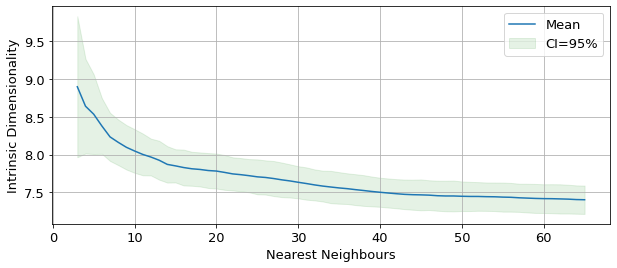

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

### code from the provided link (https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm(iters)
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

k1 = 3 # start of interval(included)
k2 = 65 # end of interval(included)
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data, 
                             mode='bootstrap', 
                             nb_iter=10, # nb_iter for bootstrapping
                             verbose=1, 
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)
# the shape of intdim_k_repeated is (nb_iter, size_of_interval) where 
# nb_iter is number of bootstrap iterations (here 500) and size_of_interval
# is (k2 - k1 + 1).
# Plotting the histogram of intrinsic dimensionality estimations repeated over
# nb_iter experiments

import scipy

confidence_level = 0.95
sample_standard_error = scipy.stats.sem(intdim_k_repeated)
sample_means = intdim_k_repeated.mean(axis=0)

ci = scipy.stats.norm.interval(confidence_level, sample_means, sample_standard_error)

plt.figure(figsize=(10,4))

plt.plot(np.arange(k1, k2+1), sample_means, label='Mean')
#plt.fill_between( np.arange(k2-k1 + 1), ci[0], ci[1], color='green', alpha=0.1, label='CI=95%')
plt.fill_between(np.arange(k1, k2+1), 
                 sample_means - 2 * np.std(intdim_k_repeated, axis=0),
                 sample_means + 2 * np.std(intdim_k_repeated, axis=0),
                 alpha=0.1,
                 label='CI=95%',
                 color='g')

plt.xlabel("Nearest Neighbours", fontsize=13)
plt.ylabel("Intrinsic Dimensionality", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.legend(fontsize=13);
  
### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

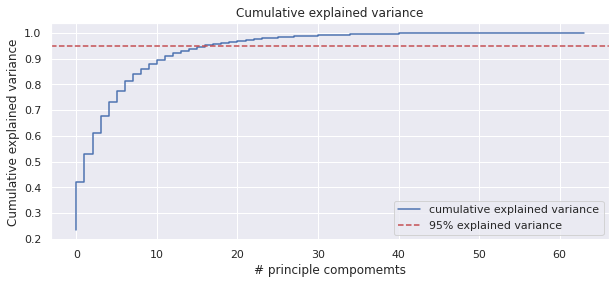

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.decomposition import PCA

mask_4 = dg.target == 4
data_4 = data[mask_4]

size = np.min(data_4.shape)
pca = PCA(size, random_state=42)
pca.fit(data_4)
expl_var = pca.explained_variance_ratio_

import seaborn as sns
sns.set()

cumsum = np.cumsum(expl_var)

plt.figure(figsize=(10,4))
plt.step(np.arange(size), cumsum, label='cumulative explained variance')
#plt.plot(np.arange(size), 0.95*np.ones(size), '--', label='95% explained variance')
plt.axhline(0.95, ls='--', label='95% explained variance', c='r')
plt.xlabel('# principle compomemts')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance')
plt.legend();

  
### END SOLUTION (do not delete this comment!)

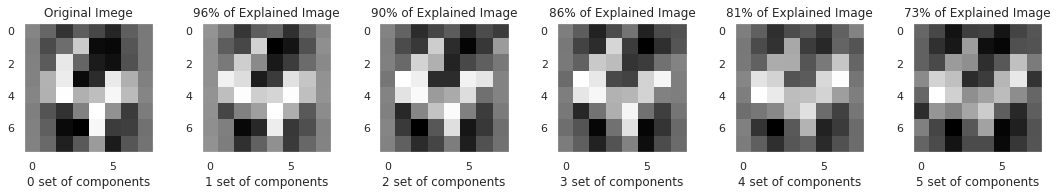

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
fig, ax = plt.subplots(1, 6)#, figsize=(20,20))
fig.tight_layout()

number_of_components = [64, 20, 13, 10, 8 ,6]

for i, n in enumerate(number_of_components):
  pca = PCA(n, random_state=42)
  data_new = pca.fit_transform(data_4)
  ax[i].imshow(pca.inverse_transform(data_new)[10].reshape(-1, 8), cmap='gray')
  ax[i].grid(False)
  if n == 64:
    ax[i].set_title("Original Imege")
  else:
    ax[i].set_title('{}% of Explained Image'.format(int(cumsum[n-1]*100)))
  ax[i].set_xlabel('{} set of components'.format(i))

  
### END SOLUTION (do not delete this comment!)

### Task 3.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [ ]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)#increasing max_iter to avoid warnings didn't change accuracy 
                                                                     #(but took more time), so I decided to import ignoring of these warnings


from tqdm.notebook import tqdm

n_components = 7 #we see, that our intrinsic dimensionality converges to about 7.4-7.5, so I took 7 components

pca = PCA(n_components, random_state=42)
ica = FastICA(n_components, random_state=42)
isomap = Isomap(n_components=n_components)

lr = LogisticRegression()

# data_pca = pca.fit_transform(data)
# data_ica = ica.fit_transform(data)
# data_isomap = isomap.fit_transform(data)

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

accuracy_arr = []

for train_index, test_index in tqdm(rkf.split(data)):
  X_train, X_test = data[train_index], data[test_index]
  
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  X_train_ica = ica.fit_transform(X_train)
  X_test_ica = ica.transform(X_test)
  X_train_isomap = isomap.fit_transform(X_train)
  X_test_isomap = isomap.transform(X_test)
  
  y_train, y_test = dg.target[train_index], dg.target[test_index]

  lr.fit(X_train_pca, y_train)
  accuracy_arr.append(accuracy_score(y_test, lr.predict(X_test_pca)))

  lr.fit(X_train_ica, y_train)
  accuracy_arr.append(accuracy_score(y_test, lr.predict(X_test_ica)))

  lr.fit(X_train_isomap, y_train)
  accuracy_arr.append(accuracy_score(y_test, lr.predict(X_test_isomap)))

  
### END SOLUTION (do not delete this comment!)

2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
from scipy import stats
import numpy as np

pca_error = np.array(accuracy_arr[::3])
ica_error = np.array(accuracy_arr[1::3])
isomap_error = np.array(accuracy_arr[2::3])

isomap_pca_stat, isomap_pca_p_value = stats.ttest_ind(isomap_error, pca_error)
isomap_ica_stat, isomap_ica_p_value = stats.ttest_ind(isomap_error, ica_error)

print("Isomap_PCA t-statistic absolute value = {}".format(np.abs(isomap_pca_stat)))
print("Isomap_PCA p-value = {}".format(isomap_pca_p_value))
print("Isomap_ICA t-statistic absolute value = {}".format(np.abs(isomap_ica_stat)))
print("Isomap_ICA p-value = {}".format(isomap_ica_p_value))


### END SOLUTION (do not delete this comment!)

Isomap_PCA t-statistic absolute value = 13.044282265948354
Isomap_PCA p-value = 2.0295798063886685e-13
Isomap_ICA t-statistic absolute value = 28.64396182815352
Isomap_ICA p-value = 2.7576107695472354e-22


3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*

Calculating T-test for Isomap_ICA and Isomap_PCA pairs we can see, that absolute values of t-statistic are big (28 and 13 respectively) and p-values are small (2e-22 and 2e-13 respectively). So we can with high confidence say, that difference in accuracy values is not a fluke.

*END SOLUTION (do not delete this comment!)*

### Task 3.3. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
import timeit
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#I've made the same experiment for scaled data, but didn't achieve 0.93 accuracy score.
# Score for model with params: [pca_n_comp=60, knn_n_neighbors=4, knn_weights=distance] the score is 0.9233
# Time: 91.4858949620002
# Score for model with params: [pca_n_comp=60, knn_n_neighbors=4, knn_weights=uniform] the score is 0.9162
# Time: 94.79210327199962
# Score for model with params: [pca_n_comp=60, knn_n_neighbors=5, knn_weights=distance] the score is 0.9178
# Time: 103.19309296099982
# Score for model with params: [pca_n_comp=60, knn_n_neighbors=5, knn_weights=uniform] the score is 0.9133
# Time: 98.14435470200033
# Score for model with params: [pca_n_comp=85, knn_n_neighbors=4, knn_weights=distance] the score is 0.9222
# Time: 167.1630183670004
# Score for model with params: [pca_n_comp=85, knn_n_neighbors=4, knn_weights=uniform] the score is 0.9147
# Time: 169.50052578300028
# Score for model with params: [pca_n_comp=85, knn_n_neighbors=5, knn_weights=distance] the score is 0.9194
# Time: 172.34372988699988
# Score for model with params: [pca_n_comp=85, knn_n_neighbors=5, knn_weights=uniform] the score is 0.9146
# Time: 178.37004266199983

n_components_arr = [60, 7*784//64]
n_neigh_knn = [4, 5]
weights_arr = ['distance', 'uniform']
scores = []

for n_components in tqdm(n_components_arr):
  for n_neighbors in n_neigh_knn:
    for weights in weights_arr:
      start = timeit.default_timer()

      pca = PCA(n_components=n_components, random_state = 42)
      #I used pca, cause I could not wait until the end of isomap (10+ minutes, while pca works for 5-6 seconds), altough isomap gave
      #better results on MNIST

      x_train_pca = pca.fit_transform(x_train)
      x_test_pca = pca.transform(x_test)


      knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, n_jobs=-1)

      knn.fit(x_train_pca, y_train)
      pred = knn.predict(x_test_pca)

      scores.append(accuracy_score(y_test, pred))
      stop = timeit.default_timer()
      print('Score for model with params: [pca_n_comp={}, knn_n_neighbors={}, knn_weights={}] the score is {}'.format(n_components, 
                                                                                                  n_neighbors, weights,  scores[-1]))
      print('Time:', stop - start)
# So the best solution in accuracy and computational time is model with params: 
#[pca_n_comp=60, knn_n_neighbors=4, knn_weights=distance] the score is 0.9399
  
### END SOLUTION (do not delete this comment!)

Score for model with params: [pca_n_comp=60, knn_n_neighbors=4, knn_weights=distance] the score is 0.9399
Time: 83.54640922199997
Score for model with params: [pca_n_comp=60, knn_n_neighbors=4, knn_weights=uniform] the score is 0.9319
Time: 83.4561494769996
Score for model with params: [pca_n_comp=60, knn_n_neighbors=5, knn_weights=distance] the score is 0.9366
Time: 85.39804120000008
Score for model with params: [pca_n_comp=60, knn_n_neighbors=5, knn_weights=uniform] the score is 0.9342
Time: 85.58993621800073
Score for model with params: [pca_n_comp=85, knn_n_neighbors=4, knn_weights=distance] the score is 0.9386
Time: 121.09501405699939
Score for model with params: [pca_n_comp=85, knn_n_neighbors=4, knn_weights=uniform] the score is 0.9325
Time: 121.28812366199963
Score for model with params: [pca_n_comp=85, knn_n_neighbors=5, knn_weights=distance] the score is 0.9372
Time: 126.51917199699983
Score for model with params: [pca_n_comp=85, knn_n_neighbors=5, knn_weights=uniform] the sc

## Task 4 - Clustering (2 pts.)

### Task 4.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [ ]:
import numpy as np

True number of clusters is 15


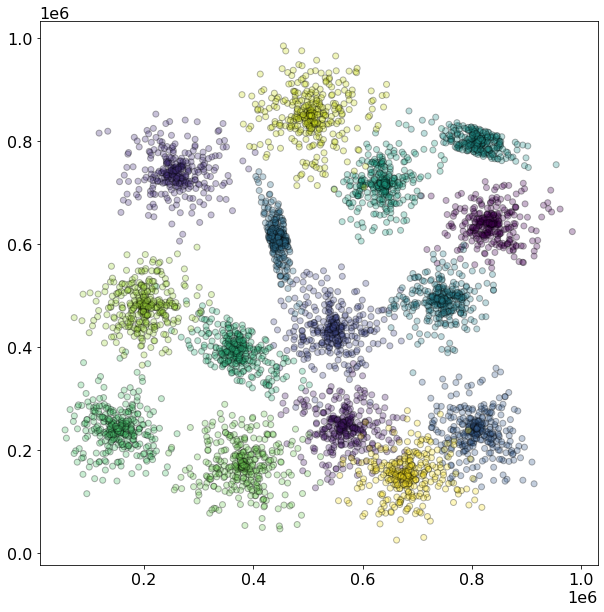

In [ ]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [ ]:
## BEGIN SOLUTION (do not delete this comment!)

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder

metrics_df = pd.DataFrame()

# def cluster_scoring(X, y, dummy_labels):
#     print("Silhouette Score: %.3f" % silhouette_score(X, dummy_labels))
#     print("Mutual Information: %.3f" % mutual_info_score(y, dummy_labels))

def cluster_scoreing_pivot(X, y, dummy_labels, metrics_df, alg, params):
    #cluster_scoring(X, y, dummy_labels)
    metrics_df = metrics_df.append({'algorithm':alg,
                                    'params' : params,
                                    'silhouette': silhouette_score(X, dummy_labels),
                                    'mutual info': mutual_info_score(y, dummy_labels)}, ignore_index =True) 
    return metrics_df 


points = StandardScaler().fit_transform(points)

kmeans_param_grid = {'n_clusters' : [15], 'init' : ['k-means++', 'random'],  'max_iter' : [300, 400, 500], 
                                              'n_init' : [10, 15], 'random_state' : [42], 'n_jobs' : [-1]}
gm_param_grid = {'n_components' : [15], 'max_iter' : [300, 400], 'n_init' : [1, 5], 'init_params' : ['kmeans', 'random'],
                 'covariance_type' : ['full', 'spherical', 'tied', 'diag'], 'random_state' : [42]}
ac_param_grid = {'n_clusters' : [15], 'linkage' : ['ward', 'complete', 'average', 'single']}
dbscan_param_grid = { 'eps' : [0.093, 0.111, 0.065], 'min_samples' : [5, 3, 10], 'n_jobs' : [-1]}


for i, params in tqdm(enumerate(ParameterGrid(kmeans_param_grid))):
  kmeans = KMeans(**params)
  metrics_df = cluster_scoreing_pivot(points, labels, kmeans.fit_predict(points), metrics_df, 'KMeans', params)

for i, params in tqdm(enumerate(ParameterGrid(gm_param_grid))):
  gm = GaussianMixture(**params)
  metrics_df = cluster_scoreing_pivot(points, labels, gm.fit_predict(points), metrics_df, 'GaussianMixture', params)

for i, params in tqdm(enumerate(ParameterGrid(ac_param_grid))):
  ac = AgglomerativeClustering(**params)
  metrics_df = cluster_scoreing_pivot(points, labels, ac.fit_predict(points), metrics_df, 'AgglomerativeClustering', params)

for i, params in tqdm(enumerate(ParameterGrid(dbscan_param_grid))):
  dbscan = DBSCAN(**params)
  metrics_df = cluster_scoreing_pivot(points, labels, LabelEncoder().fit_transform(dbscan.fit_predict(points)), 
                                      metrics_df, 'DBSCAN', params)


pd.set_option('display.max_colwidth', None)
best_models_df = metrics_df.groupby(['algorithm']).apply(lambda x: x.nlargest(1,['mutual info'])).reset_index(drop=True)
display(best_models_df[['algorithm', 'mutual info', 'silhouette', 'params']])
pd.reset_option('display.max_colwidth')


### END SOLUTION (do not delete this comment!)

,algorithm,mutual info,silhouette,params
0,AgglomerativeClustering,2.527305,0.612148,"{'linkage': 'ward', 'n_clusters': 15}"
1,DBSCAN,2.204150,0.473606,"{'eps': 0.093, 'min_samples': 10, 'n_jobs': -1}"
2,GaussianMixture,2.566098,0.622720,"{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 300, 'n_components': 15, 'n_init': 1, 'random_state': 42}"
3,KMeans,2.562087,0.626358,"{'init': 'k-means++', 'max_iter': 300, 'n_clusters': 15, 'n_init': 10, 'n_jobs': -1, 'random_state': 42}"


2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

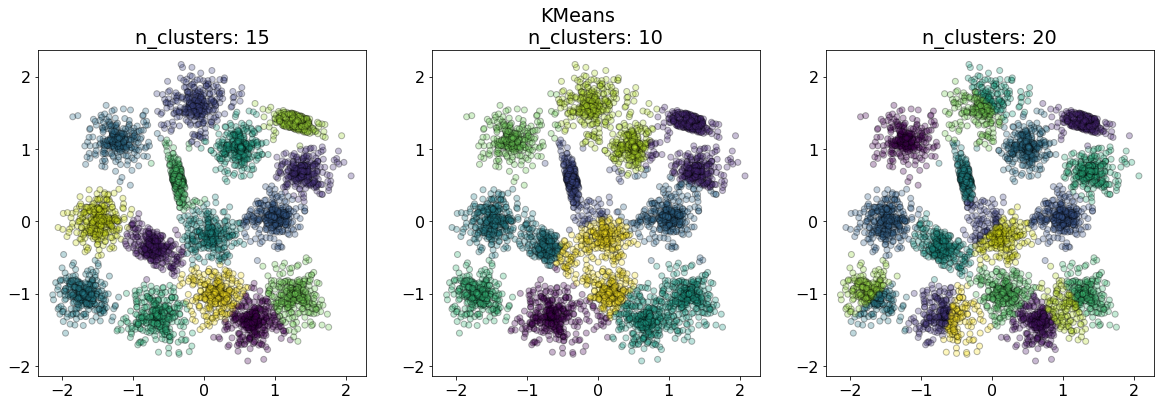

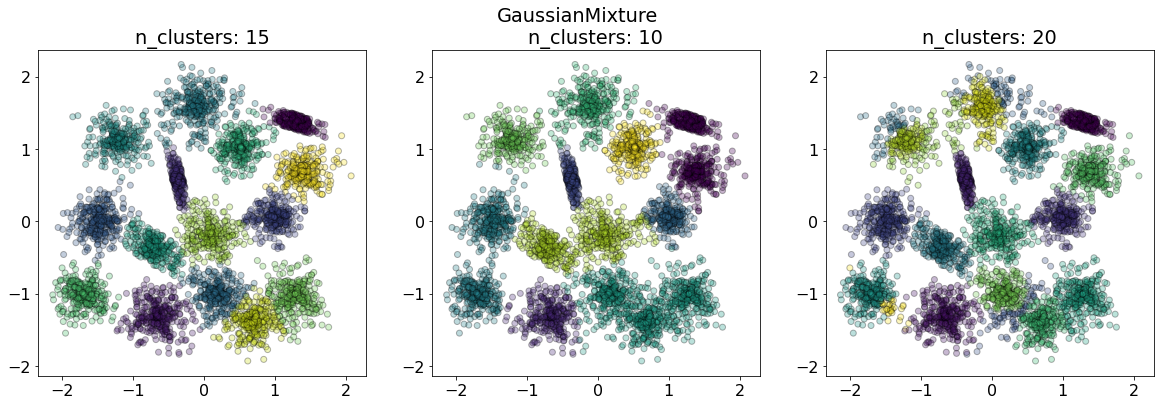

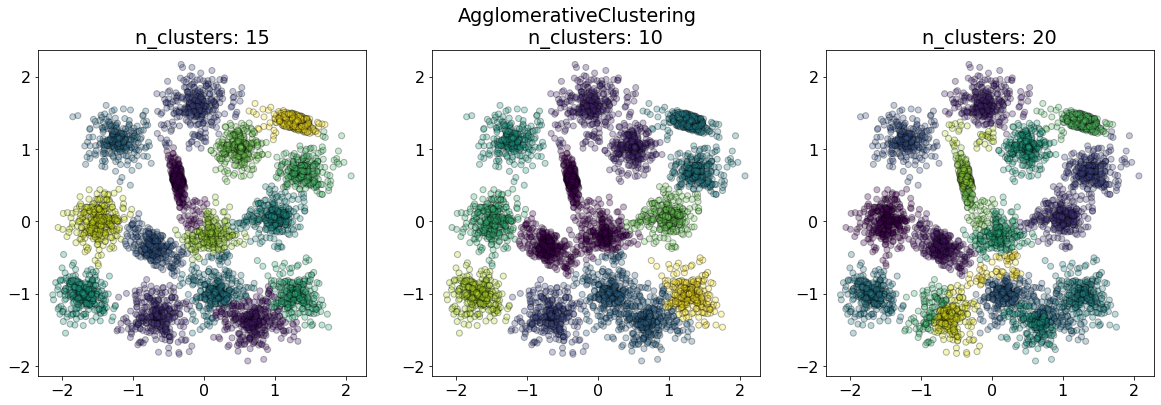

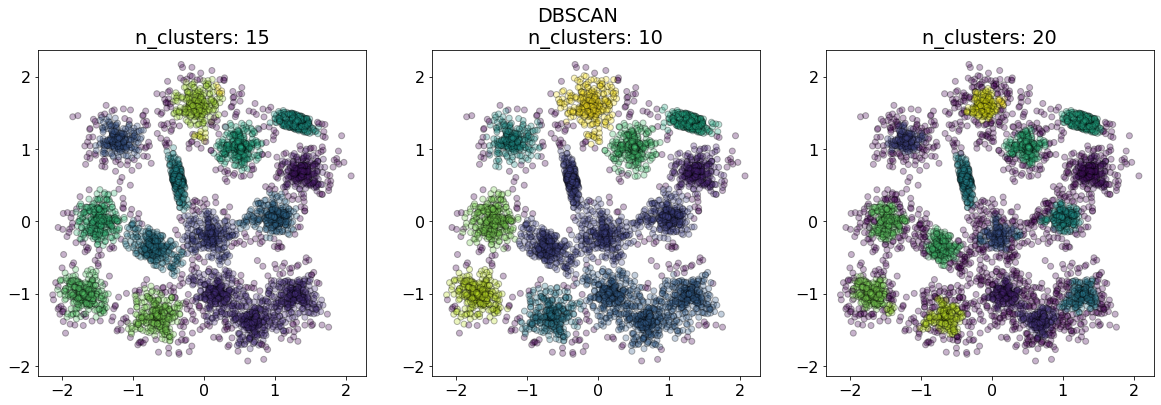

In [ ]:
## BEGIN SOLUTION (do not delete this comment!)

kmeans_best = KMeans(**(best_models_df[best_models_df.algorithm == 'KMeans'].params.values[0]))
gm_best = GaussianMixture(**(best_models_df[best_models_df.algorithm == 'GaussianMixture'].params.values[0]))
ac_best = AgglomerativeClustering(**(best_models_df[best_models_df.algorithm == 'AgglomerativeClustering'].params.values[0]))
dbscan_best = DBSCAN(**(best_models_df[best_models_df.algorithm == 'DBSCAN'].params.values[0]))

n_clusters_arr = [15, 10, 20]

def plot_clusters(model, model_name, n_clusters_arr, name_n_clusters='n_clusters'):
  fig, axs = plt.subplots(1, 3, figsize=(20,6))
  fig.suptitle(model_name)
  for i, n_clusters in enumerate(n_clusters_arr):
    model.set_params(**({name_n_clusters : n_clusters}))
    labels_pred = model.fit_predict(points)
    axs[i].scatter(points[:,0], points[:,1], c=labels_pred, alpha=0.3, edgecolor='k')
    axs[i].set_title('n_clusters: {}'.format(n_clusters))

plot_clusters(kmeans_best, 'KMeans', n_clusters_arr)
plot_clusters(gm_best, 'GaussianMixture', n_clusters_arr, 'n_components')
plot_clusters(ac_best, 'AgglomerativeClustering', n_clusters_arr)

fig, axs = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('DBSCAN')
for i, eps in enumerate([0.093, 0.111, 0.065]):#DBSCAN doesn't have n_clusters param, but it depends on eps, so I decided to vary this parameter
  dbscan_best.set_params(**({'eps' : eps}))
  labels_pred = LabelEncoder().fit_transform(dbscan_best.fit_predict(points))
  axs[i].scatter(points[:,0], points[:,1], c=labels_pred, alpha=0.3, edgecolor='k')
  axs[i].set_title('n_clusters: {}'.format(len(np.unique(labels_pred)) - 1))

### END SOLUTION (do not delete this comment!)

3) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


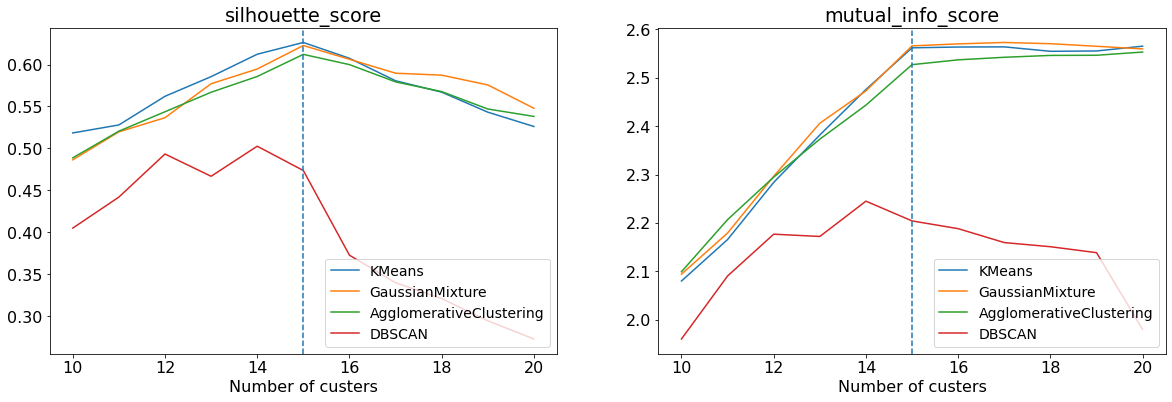

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

#kmeans_best = KMeans(**({'init': 'k-means++', 'max_iter': 300, 'n_clusters': 15, 'n_init': 10, 'n_jobs': -1, 'random_state': 42}))
kmeans_best = KMeans(**(best_models_df[best_models_df.algorithm == 'KMeans'].params.values[0]))
gm_best = GaussianMixture(**(best_models_df[best_models_df.algorithm == 'GaussianMixture'].params.values[0]))
ac_best = AgglomerativeClustering(**(best_models_df[best_models_df.algorithm == 'AgglomerativeClustering'].params.values[0]))
dbscan_best = DBSCAN(**(best_models_df[best_models_df.algorithm == 'DBSCAN'].params.values[0]))

def get_scores(model, n_clusters_arr, name_n_clusters='n_clusters', points=points, labels=labels):
  silhouette_score_arr = []
  mutual_info_score_arr = []
  for i, n_clusters in tqdm(enumerate(n_clusters_arr)):
    model.set_params(**({name_n_clusters : n_clusters}))
    labels_pred = model.fit_predict(points)
    silhouette_score_arr.append(silhouette_score(points, labels_pred))
    mutual_info_score_arr.append(mutual_info_score(labels, labels_pred))
  return silhouette_score_arr, mutual_info_score_arr
    

n_clusters_arr = np.arange(10, 21)
ss_k, mis_k = get_scores(kmeans_best, n_clusters_arr)
ss_gm, mis_gm = get_scores(gm_best, n_clusters_arr, 'n_components')
ss_ac, mis_ac = get_scores(ac_best, n_clusters_arr)

ss_dbscan, mis_dbscan = [], []
n_of_clusters_dbscan = []
for i, eps in tqdm(enumerate([0.111, 0.11, 0.102, 0.101, 0.1, 0.093, 0.091, 0.087, 0.0863, 0.085, 0.065])):
  #DBSCAN doesn't have n_clusters param, so I chose such eps, where n_clusters = [10..20]
  dbscan_best.set_params(**({'eps' : eps}))
  labels_pred = LabelEncoder().fit_transform(dbscan_best.fit_predict(points))
  n_of_clusters_dbscan.append(len(np.unique(labels_pred)) - 1)
  ss_dbscan.append(silhouette_score(points, labels_pred))
  mis_dbscan.append(mutual_info_score(labels, labels_pred))

fig, axs = plt.subplots(1, 2, figsize=(20,6))

axs[0].plot(n_clusters_arr, ss_k, label='KMeans')
axs[0].plot(n_clusters_arr, ss_gm, label='GaussianMixture')
axs[0].plot(n_clusters_arr, ss_ac, label='AgglomerativeClustering')
axs[0].plot(n_of_clusters_dbscan, ss_dbscan, label='DBSCAN')
axs[0].axvline(15, ls='--')
axs[0].set_title('silhouette_score')
axs[0].set_xlabel('Number of custers')
axs[0].legend(fontsize=14, loc='lower right');

axs[1].plot(n_clusters_arr, mis_k, label='KMeans')
axs[1].plot(n_clusters_arr, mis_gm, label='GaussianMixture')
axs[1].plot(n_clusters_arr, mis_ac, label='AgglomerativeClustering')
axs[1].plot(n_of_clusters_dbscan, mis_dbscan, label='DBSCAN')
axs[1].axvline(15, ls='--')
axs[1].set_title('mutual_info_score')
axs[1].set_xlabel('Number of custers')
axs[1].legend(fontsize=14, loc='lower right');


  
### END SOLUTION (do not delete this comment!)

### Task 4.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

import scipy
import numpy as np
np.random.seed(42)#for random choice to work in the same way

model = KMeans(**(best_models_df[best_models_df.algorithm == 'KMeans'].params.values[0]))
n_clusters_arr = np.arange(10, 21)

n_steps = 50
all_arrs = []

for i, n_clusters in tqdm(enumerate(n_clusters_arr)):
  silhouette_score_arr = []
  for j in range(n_steps):
    model.set_params(**({'n_clusters' : n_clusters}))
    indexes = np.random.choice(np.arange(points.shape[0]), points.shape[0])
    labels_pred = model.fit_predict(points[indexes])
    silhouette_score_arr.append(silhouette_score(points[indexes], labels_pred))
  silhouette_score_arr = np.array(silhouette_score_arr)
  all_arrs.append(silhouette_score_arr)
  print('Number of clusters:', n_clusters)
  print('\tVariance:', np.var(silhouette_score_arr))
  print('\tConfidence interval:', scipy.stats.norm.interval(0.95, silhouette_score_arr.mean(), np.std(silhouette_score_arr)))
  # print('\tConfidence interval(2std):', tuple((np.mean(silhouette_score_arr) - 2* np.std(silhouette_score_arr), 
  #                                             np.mean(silhouette_score_arr) + 2* np.std(silhouette_score_arr))))
  print()
all_arrs = np.array(all_arrs)


### END SOLUTION (do not delete this comment!)

Number of clusters: 10
	Variance: 2.757108452808463e-05
	Confidence interval: (0.5073828050243179, 0.5279656314440799)

Number of clusters: 11
	Variance: 3.6673336462328904e-05
	Confidence interval: (0.5257687355155921, 0.549507236886782)

Number of clusters: 12
	Variance: 2.4614736015372433e-05
	Confidence interval: (0.5536706239729247, 0.5731186567562484)

Number of clusters: 13
	Variance: 2.7936861064952858e-05
	Confidence interval: (0.575452802757075, 0.5961717121261002)

Number of clusters: 14
	Variance: 2.398703319914237e-05
	Confidence interval: (0.6036070786900438, 0.6228055369890977)

Number of clusters: 15
	Variance: 1.6242093659499025e-05
	Confidence interval: (0.6206473030514802, 0.6364451932846503)

Number of clusters: 16
	Variance: 2.495247101858271e-05
	Confidence interval: (0.6011744513222318, 0.6207554512857115)

Number of clusters: 17
	Variance: 4.4328317386423275e-05
	Confidence interval: (0.5803412309687382, 0.6064399210378283)

Number of clusters: 18
	Variance: 6.8

2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

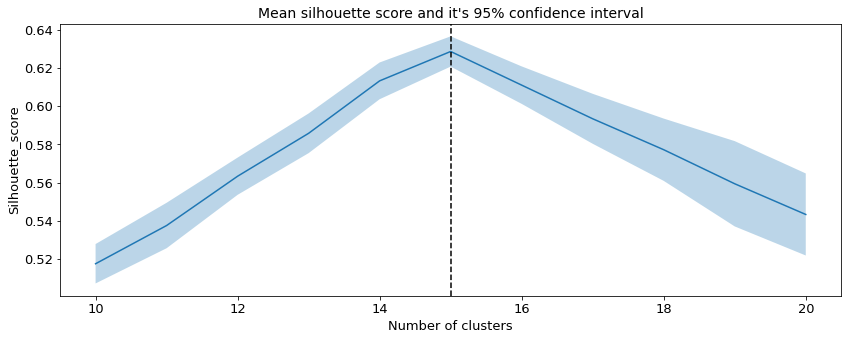

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

all_arrs = all_arrs.T
confidence_level = 0.95
#sample_standard_error = scipy.stats.sem(all_arrs)
sample_standard_error = np.std(all_arrs, axis=0)
sample_means = all_arrs.mean(axis=0)

lower, upper = scipy.stats.norm.interval(confidence_level, sample_means, sample_standard_error)

plt.figure(figsize=(14,5))
plt.plot(n_clusters_arr, sample_means)
plt.fill_between(n_clusters_arr, lower, upper, alpha=0.3)
# plt.fill_between(n_clusters_arr, 
#                  sample_means - 2 * np.std(all_arrs, axis=0), 
#                  sample_means + 2 * np.std(all_arrs, axis=0), 
#                  alpha=0.3)
plt.axvline(15, ls='--', c='k')
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("Silhouette_score", fontsize=13)
plt.title("Mean silhouette score and it's 95% confidence interval", fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

### END SOLUTION (do not delete this comment!)

## Task 5. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 5.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('./creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
  
# impurity estimation on test data

contamination = test_y[test_y == 1].shape[0]/test_y.shape[0]

### END SOLUTION (do not delete this comment!)

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

iso_for = IsolationForest(random_state=42, n_jobs=-1)
lof = LocalOutlierFactor(n_jobs=-1, novelty=True)
ee = EllipticEnvelope(random_state=42, support_fraction=0.99)

models = [iso_for, lof, ee]

for i in [0.1, 1, 10]:
  for model in models:
    model.set_params(**({'contamination' : contamination*i}))
    model.fit(train_X)
    labels_isolation = model.predict(test_X)
    labels_isolation = np.array(labels_isolation == -1, dtype=int)
    print(model.__class__.__name__, ': ', end='')
    print('Contamination: ', np.round(contamination * i, 3), ' ', 
          'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
          'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))
    
#The best performing algorithm depends on our purposes. If we want to choose the one, which will rarely call 'normal' point an outlier - 
#we need to choose higher precision. However, small ROC-AUC leeds to more false negatives, which will lead to leaving more anomalies 
#in the dataset. So, I guess, the most compromise ones are IsolationForest and EllipticEnvelope with Contamination=0.169, because
#they give us balanced values of both Precision and ROC_AUC.

### END SOLUTION (do not delete this comment!)

IsolationForest : Contamination:  0.002   ROC/AUC:  0.531 Precision:  0.984
LocalOutlierFactor : Contamination:  0.002   ROC/AUC:  0.499 Precision:  0.981
EllipticEnvelope : Contamination:  0.002   ROC/AUC:  0.51 Precision:  0.983
IsolationForest : Contamination:  0.017   ROC/AUC:  0.773 Precision:  0.987
LocalOutlierFactor : Contamination:  0.017   ROC/AUC:  0.5 Precision:  0.963
EllipticEnvelope : Contamination:  0.017   ROC/AUC:  0.731 Precision:  0.983
IsolationForest : Contamination:  0.169   ROC/AUC:  0.871 Precision:  0.845
LocalOutlierFactor : Contamination:  0.169   ROC/AUC:  0.506 Precision:  0.817
EllipticEnvelope : Contamination:  0.169   ROC/AUC:  0.864 Precision:  0.851


### Task 5.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold. Write 1-2 sentences on your findings.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

# your favorite classifier

from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import precision_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_score = []
pr_score = []

for train_index, test_index in skf.split(test_X, test_y):
    # model = GradientBoostingClassifier(random_state=42)
    model = LogisticRegression(random_state=42, n_jobs=-1)

    X_train, y_train = test_X.iloc[train_index], test_y.iloc[train_index]
    X_test, y_test = test_X.iloc[test_index], test_y.iloc[test_index]
    # oversample = SMOTE(sampling_strategy=0.1)
    # X, y = oversample.fit_resample(X_train, y_train)
    # under = RandomUnderSampler(sampling_strategy=0.5)
    # X, y = under.fit_resample(X, y)
    
    model.fit(X_train, y_train)
    # model.fit(X, y)
    roc_auc_score.append(ras(y_test, model.predict_proba(X_test)[:,1]))
    pr_score.append(precision_score(y_test, model.predict(X_test)))
    
    
### END SOLUTION (do not delete this comment!)

print('ROC/AUC mean: ', np.mean(roc_auc_score), 'std: ', np.std(roc_auc_score))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))

ROC/AUC mean:  0.9226797627872498 std:  0.11669261307742777
Precision mean:  0.8371428571428572 std:  0.2141142170879451


In [ ]:
### BEGIN SOLUTION (do not delete this comment!)

# ensemble of classifiers
skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_score = []

for train_index, test_index in skf.split(test_X, test_y):
  anomaly_det_model = IsolationForest(random_state=42, n_jobs=-1, contamination=contamination*10)
  model = LogisticRegression(random_state=42, n_jobs=-1)

  X_train, y_train = test_X.iloc[train_index], test_y.iloc[train_index]
  X_test, y_test = test_X.iloc[test_index], test_y.iloc[test_index]

  model.fit(X_train, y_train)
  anomaly_det_model.fit(train_X)

  model_pred_proba = model.predict_proba(X_test)[:,1]
  model_pred = model.predict(X_test)
  anomaly_pred = anomaly_det_model.fit_predict(X_test)
  anomaly_pred = np.array(anomaly_pred == -1, dtype=int)

  anomaly_pred_factors = - 0.4 * (anomaly_pred == 0)#-0.4 was hardcoded. However, the idea was the following:
  #I've checked anomaly_det_model predictions, and there was a big ROC_AUC and small precision. So it gave lots of false positives.
  #Thats why I decided, that it worth trusting only in identifying 'normal' objects (pred=0). -0.4 shows, that even probability=1
  #for model is 60\40 for being true anomaly. That was the idea.
  model_pred_proba_2 = np.maximum(0, np.minimum(1, model_pred_proba + anomaly_pred_factors))

  roc_auc_score.append(ras(y_test, model_pred_proba_2))
  pr_score.append(precision_score(y_test, model_pred_proba_2 >= 0.5))


#I used anomaly detection model for making my main model more confident in identifying 'normal' objects. So if anomaly model says, that this
#object might be 'unnormal', I used main model (LogReg) predictions. However, if anomaly model treats an object as a usual one, I gave -0.4
#probabilty for main model predictions. As it helped to improve both precision and ROC_AUC, I think this approach worked. 
#Anomaly as an expert in 'normal' objects and main model as an expert in anomaly ones.

    
### END SOLUTION (do not delete this comment!)
    
print('ROC/AUC mean: ', np.mean(roc_auc_score), 'std: ', np.std(roc_auc_score))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))

ROC/AUC mean:  0.9303148834527634 std:  0.08070138826750073
Precision mean:  0.8633333333333333 std:  0.18040078836979745
